# HW5

# II. Analyzing Data

In [216]:
import pandas as pd
import numpy as np
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from arch import arch_model

import warnings
warnings.filterwarnings("ignore")

import importlib
import utils as ut
importlib.reload(ut)

<module 'utils' from '/Users/chuan/github/0_Quantitative_Portfolio_Manager/homework/utils.py'>

# 2. The Factors

DFA believes certain stocks have higher expected excess returns. In addition to the overall market equity premium, DFA believes that there is a premium attached to a "size" and "value" factor. Note that these three factors are already listed as excess returns. 

Use the data found in <file>'dfa analysis data.xlsx'</file>.

- FACTORS: Monthly excess return data for the overall equity market, $\tilde{r}^{m}$. The sheet also contains data on two additional factors, SMB and HML, as well as the risk-free rate. You do not need any of these columns for the homework. Just use the MKT column, which is excess market returns. (So no need to subtract the risk-free rate.)

## 2.1 
Analyze the factors, similar to how you analyzed the three Fama-French factors in Homework 4.
You now have three additional factors, so let’s compare there univariate statistics.
- mean
- volatility
- Sharpe
- VaR(.05)

In [3]:
file_path = './../data/factor_pricing_data.xlsx'

descriptions = pd.read_excel(file_path) # first sheet
descriptions.set_index(descriptions.columns[0], inplace=True)
descriptions.index.name = 'Symbol'
display(descriptions)

factors = pd.read_excel(file_path, sheet_name='factors (excess returns)').set_index('Date')
display(factors)

portfolio_excess_returns = pd.read_excel(file_path, sheet_name='portfolios (excess returns)').set_index('Date')
display(portfolio_excess_returns)

risk_free_rate = pd.read_excel(file_path, sheet_name='risk-free rate').set_index('Date')
display(risk_free_rate)

,Name,Unit,Construction,Description
Symbol,,,,
MKT,Market,Excess Return,Market-cap-weighted,US Equities
SMB,Size,Excess Return,Small Minus Big,Long small stocks and short big stocks
HML,Value,Excess Return,High Minus Low,Long value (high book-to-market) stocks and sh...
RMW,Profitability,Excess Return,Robust Minus Weak,Long profitability (income statement) and shor...
CMA,Investment,Excess Return,Conservative Minus Agressive,Long stocks with low (conservative) investment...
UMD,Momentum,Excess Return,Up Minus Down,Long stocks that have high recent returns and ...
RF,Risk-free rate,Total Return,Tbills,NaN


,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
1980-01-31,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0755
1980-02-29,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0788
1980-03-31,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,-0.0955
1980-04-30,0.0397,0.0105,0.0106,-0.0210,0.0029,-0.0043
1980-05-31,0.0526,0.0211,0.0038,0.0034,-0.0031,-0.0112
...,...,...,...,...,...,...
2023-03-31,0.0251,-0.0694,-0.0885,0.0224,-0.0237,-0.0249
2023-04-30,0.0061,-0.0256,-0.0004,0.0242,0.0286,0.0163
2023-05-31,0.0035,-0.0038,-0.0772,-0.0181,-0.0722,-0.0063


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,-0.0076,0.0285,0.0084,0.1009,-0.0143,0.1002,0.0362,0.0323,0.0048,0.0059,...,0.0158,0.0875,0.0465,-0.0126,0.0430,-0.0283,0.0258,0.0768,0.0308,0.0669
1980-02-29,0.0105,-0.0608,-0.0966,-0.0322,-0.0569,-0.0323,-0.0521,-0.0800,-0.0555,-0.0167,...,-0.0079,-0.0541,-0.0346,-0.0639,-0.0652,-0.0854,-0.0959,-0.0347,-0.0282,-0.0274
1980-03-31,-0.2224,-0.1119,-0.0167,-0.1469,-0.0193,-0.1271,-0.0826,-0.1237,-0.0566,-0.0668,...,-0.0819,-0.1509,-0.1098,-0.0906,-0.1449,-0.0560,-0.0880,-0.2451,-0.1254,-0.1726
1980-04-30,0.0449,0.0766,0.0232,0.0321,0.0830,-0.0529,0.0783,0.0153,0.0304,0.0115,...,0.0420,-0.0103,-0.0312,0.0353,0.0542,0.0728,0.0530,0.0977,0.0447,0.0769
1980-05-31,0.0632,0.0793,0.0457,0.0863,0.0815,0.0509,0.0324,0.0886,0.0560,0.0098,...,0.0564,0.1063,0.1142,0.0877,0.1134,0.0578,0.0557,0.0915,0.0844,0.0685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,-0.0300,0.0309,0.0479,0.0379,-0.0025,-0.0159,0.0268,-0.0416,0.0480,0.0385,...,-0.0117,-0.0118,0.0025,0.0333,0.0298,-0.1173,-0.0509,-0.0854,-0.0791,0.0206
2023-04-30,-0.0033,0.0258,0.0307,0.0383,0.0375,-0.0342,0.0044,0.0138,0.0401,0.0187,...,-0.0233,-0.0271,0.0010,0.0142,0.0471,0.0139,0.0335,-0.0083,-0.0003,0.0499
2023-05-31,-0.1130,-0.0536,-0.0418,-0.0321,-0.0909,-0.0883,0.0319,-0.0100,-0.0947,-0.1394,...,-0.0646,-0.0010,-0.0163,0.0172,-0.0552,-0.0434,-0.0408,0.0004,-0.0400,-0.0244


,RF
Date,
1980-01-31,0.0080
1980-02-29,0.0089
1980-03-31,0.0121
1980-04-30,0.0126
1980-05-31,0.0081
...,...
2023-03-31,0.0036
2023-04-30,0.0035
2023-05-31,0.0036


## 2.2 
Based on the factor statistics above, answer the following.

### a) 
Does each factor have a positive risk premium (positive expected excess return)?

Yes.

In [ ]:
ut.summary_statistics_annualized(factors)[['Mean', 'Vol', 'Sharpe', 'VaR 5%']]

,Mean,Vol,Sharpe,VaR 5%
MKT,0.0846,0.1573,0.5376,-0.0756
SMB,0.0112,0.1005,0.1115,-0.0422
HML,0.0253,0.1102,0.2299,-0.0421
RMW,0.0465,0.0834,0.5578,-0.0277
CMA,0.0325,0.0734,0.4428,-0.0275
UMD,0.0609,0.1555,0.3918,-0.0682


### b) 
How have the factors performed since the time of the case, (2015-present)?

- MKT has done by far the best, and has been soaring up compared to the other factors, especially after the case. UMD has stayed around flat after the case, although it did well before the case. SMB and HML go from positive expected returns to negative.
- Overall, all of the factors except MKT and RML do worse after the case than before the case.

In [ ]:
agg_years = [(1980, 2014), (2015, 2023)]
all_stats = [
    ut.summary_statistics_annualized(factors.loc[f'{start}':f'{end}'])[['Mean', 'Vol', 'Sharpe', 'VaR 5%']]
    .assign(Period=f'{start}-{end}')
    .reset_index()
    .rename(columns={'index': 'Factor'})
    .set_index(['Period', 'Factor'])
    for start, end in agg_years
]

result = pd.concat(all_stats)
result

Mean    Vol  Sharpe  VaR 5%
Period    Factor                               
1980-2014 MKT     0.0779 0.1561  0.4992 -0.0721
          SMB     0.0160 0.1011  0.1583 -0.0415
          HML     0.0379 0.1028  0.3685 -0.0417
          RMW     0.0460 0.0858  0.5362 -0.0302
          CMA     0.0400 0.0696  0.5751 -0.0266
          UMD     0.0743 0.1581  0.4697 -0.0682
2015-2023 MKT     0.1117 0.1627  0.6865 -0.0809
          SMB    -0.0084 0.0983 -0.0852 -0.0435
          HML    -0.0258 0.1358 -0.1901 -0.0586
          RMW     0.0486 0.0731  0.6645 -0.0240
          CMA     0.0018 0.0870  0.0206 -0.0319
          UMD     0.0065 0.1440  0.0451 -0.0674

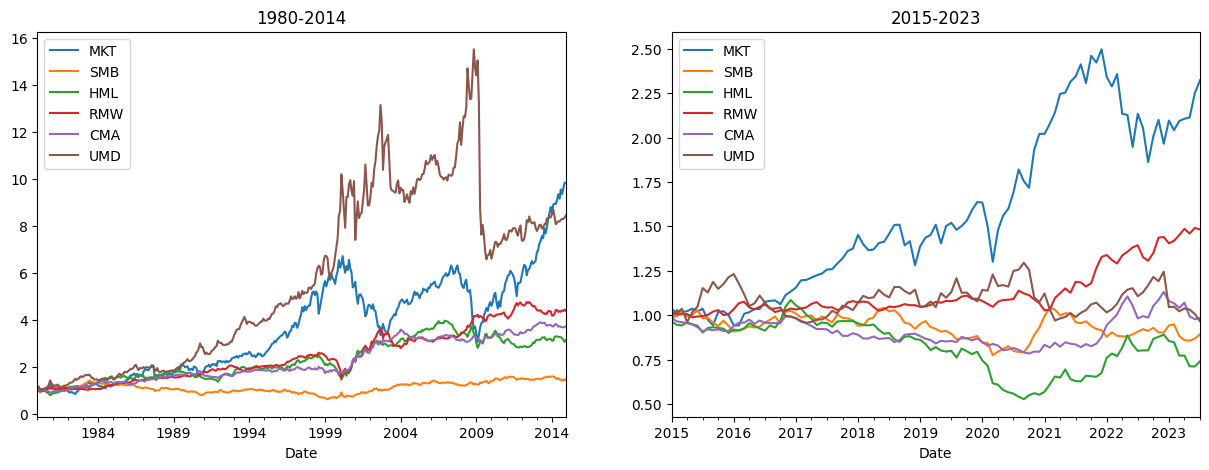

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, (start, end) in enumerate(agg_years):
    (1 + factors.loc[f'{start}':f'{end}']).cumprod().plot(ax=axes[i], title=f'{start}-{end}')

## 2.3 
Report the correlation matrix across the six factors.

### a) 
Does the construction method succeed in keeping correlations small?

With the exception of HML and CMA which has a correlation of 0.68, all of the factors have quite low correlations. A lot have negative correlations, for example RMW and SMB has a high -0.41 correlation, which is surprising.

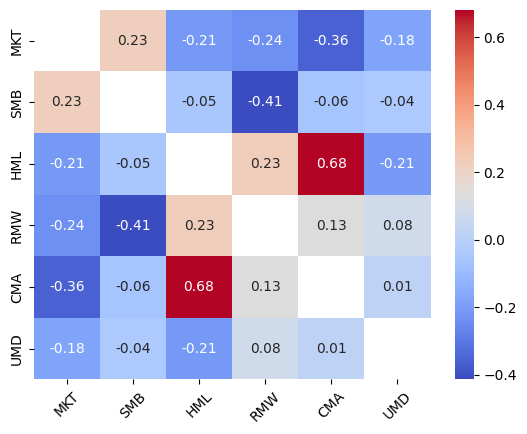

Max corr 0.68: ('HML', 'CMA')
Min corr -0.41: ('RMW', 'SMB')


In [8]:
ut.correlation_heatmap(factors)

### b) 
Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

Yes, it has the highest correlation with CMA.

## 2.4
Report the tangency weights for a portfolio of these 6 factors.

In [9]:
ut.tangency_weights(factors, shrinkage=1)

,Tangency Weights
MKT,0.2039
SMB,0.0874
HML,-0.0618
RMW,0.3074
CMA,0.3693
UMD,0.0938


### a) 
Which factors seem most important? And Least?

CMA and RMW have the highest weights, incidating that they are the most important. HML and SMB have the lowest weights, indicating that they are the least important.

### b) 
Are the factors with low mean returns still useful?

Yes, note that CMA and RMW have the highest weights, but definitely do not have the highest mean returns. Both MKT and UMD have better mean returns, but lower weights. This again goes back to the fact that when doing MV-optimization, we are not just looking at mean returns, but also covariances.

### c) 
Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

In [12]:
ut.tangency_weights(factors[['MKT', 'SMB', 'HML', 'UMD']], shrinkage=1)

,Tangency Weights
MKT,0.3564
SMB,-0.0062
HML,0.3489
UMD,0.3009


# 3. Testing Modern LPMs

Consider the following factor models:

- **CAPM**: MKT
- **Fama-French 3F**: MKT, SMB, HML
- **Fama-French 5F**: MKT, SMB, HML, RMW, CMA
- **AQR**: MKT, HML, RMW, UMD

For instance, for the AQR model:

$$E[\tilde{r}^i] = \beta^{i,MKT} E[\tilde{f}_{MKT}] + \beta^{i,HML} E[\tilde{f}_{HML}] + \beta^{i,RMW} E[\tilde{f}_{RMW}] + \beta^{i,UMD} E[\tilde{f}_{UMD}]$$

We will test these models with the time-series regressions. Namely, for each asset \(i\), estimate the following regression to test the AQR model:

$$\tilde{r}_{i,t} = \alpha^i + \beta^{i,MKT} \tilde{f}_{MKT,t} + \beta^{i,HML} \tilde{f}_{HML,t} + \beta^{i,RMW} \tilde{f}_{RMW,t} + \beta^{i,UMD} \tilde{f}_{UMD,t} + \epsilon_t$$

So, you are running that regression $n$ times, once for each security $\tilde{r}^i$.

Data:
- **PORTFOLIOS**: Monthly excess return data on 49 equity portfolios sorted by their industry. Denote these as $\tilde{r}^i$, for $n=1,...49$.
- You do NOT need the risk-free rate data. It is provided only for completeness. The other two tabs are already in terms of excess returns.

## 3.1 
**Test the AQR 4-Factor Model using the time-series test.** (We are not doing the cross-sectional regression tests.)
### a) 
For each regression, report the estimated $\alpha$ and $R^2$.

In [13]:
CAPM = ['MKT']
FF3 = ['MKT', 'SMB', 'HML']
FF5 = ['MKT', 'SMB', 'HML', 'RMW', 'CMA']
AQR = ['MKT', 'HML', 'RMW', 'UMD']

In [ ]:
stats_AQR = ut.time_series_regression_annualized(portfolio_excess_returns, factors[AQR], 1)
stats_AQR

,Alpha,Beta,R^2,Treynor Ratio,Information Ratio
Agric,0.0008,0.8378,0.3413,0.0089,0.0155
Food,0.0010,0.6809,0.4711,0.0122,0.0301
Soda,0.0016,0.7847,0.3072,0.0116,0.0306
Beer,0.0020,0.7233,0.4267,0.0138,0.0541
Smoke,0.0029,0.7372,0.2726,0.0150,0.0533
Toys,-0.0027,1.1168,0.5103,0.0047,-0.0532
Fun,0.0026,1.2489,0.6173,0.0079,0.0560
Books,-0.0025,1.1136,0.6897,0.0055,-0.0759
Hshld,-0.0005,0.7528,0.5603,0.0090,-0.0156
Clths,-0.0010,1.1186,0.6318,0.0073,-0.0249


### b) 
Calculate the mean-absolute-error of the estimated alphas:
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |\hat{\alpha}^i|$$

If the pricing model worked, should these alpha estimates be large or small? Why? Based on your MAE statistic, does this seem to support the pricing model or not?

## 3.2 
**Test the CAPM, FF 3-Factor Model and the FF 5-Factor Model.** Report the MAE statistic for each of these models and compare it with the AQR Model MAE. Which model fits best?

They are all pretty big, around 2\% annualized. The biggest one is for the FF5, and the lowest is for the vanilla CAPM. 

This does not support the pricing model. We could also run a t-test to see if the difference is statistically significant.

## 3.3 
Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?

It's hard to say. All of the models perform worse than the CAPM, so in some sense the only important factor is MKT. However, AQR performs second best, which further indicates that HML or CMA are redundant and should not be used. Yes, Fama and French should probably add the momentum factor to their model.

## 3.4
This does not matter for pricing, but report the average (across $n$ estimations) of the time-series regression $R^2$ statistics. Do these models lead to high time-series $R^2$ stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?

Not particularly. They only explain about 50-60% of the variation. This indicates moderately low explainability of excess returns by decomposition on different factor models. Thus the factors may not be considered good in a Linear Factor Decomposition of the assets.

## 3.5
We tested three models using the time-series tests (focusing on the time-series alphas). Re-test these models, but this time use the cross-sectional test.
### a) 
Report the time-series premia of the factors (just their sample averages), and compare to the cross-sectionally estimated premia of the factors. Do they differ substantially?

In [102]:
def cross_sectional_regression_statistics(mean_returns, betas, intercept=False):
    """Calculate regression statistics for each asset against a benchmark, annualized."""
    if intercept:
        betas = sm.add_constant(betas)
    regr = sm.OLS(mean_returns, betas).fit()
    results = regr.params.to_frame('Cross-Sectional Regression')
    results.loc['R^2'] = regr.rsquared
    results.loc['MAE'] = regr.resid.abs().mean()
    return results

In [ ]:
models = [CAPM, FF3, FF5, AQR]
model_names = ['CAPM', 'FF3', 'FF5', 'AQR']
factor_names = ['MKT', 'HML', 'RMW', 'UMD', 'SMB', 'CMA']

beta_table = pd.DataFrame(index=factor_names, columns=model_names + ['Time Series'])
beta_table['Time Series'] = factors.mean() * 12

for model, name in zip(models, model_names):
    time_series_stats = ut.time_series_regression_annualized(portfolio_excess_returns, factors[model], intercept=True)
    cross_section_stats = cross_sectional_regression_statistics(portfolio_excess_returns.mean().to_frame(f'{name}') * 12, time_series_stats[model])
    for factor in model:
        beta_table.loc[factor, f'{name}'] = cross_section_stats.loc[factor, 'Cross Sectional Regression']

beta_table.fillna('', inplace=True)
beta_table

,CAPM,FF3,FF5,AQR,Time Series
MKT,0.0857,0.1016,0.0957,0.0876,0.0846
HML,,-0.0175,-0.0335,-0.0398,0.0253
RMW,,,0.0359,0.0444,0.0465
UMD,,,,0.0534,0.0609
SMB,,-0.0646,-0.0577,,0.0112
CMA,,,-0.0152,,0.0325


### b) 
Report the MAE of the cross-sectional regression residuals for each of the four models. How do they compare to the MAE of the time-series alphas?

In [215]:
mae_table = pd.DataFrame()

for model, name in zip(models, model_names):
    time_series_stats = ut.regression_statistics_annualized(portfolio_excess_returns, factors[model], intercept=True)
    mae_table.loc[f'{name} TS', 'MAE'] = time_series_stats['Alpha'].abs().mean()
    mae_table.loc[f'{name} TS', 'R2'] = time_series_stats['R^2'].mean()

    cross_section_stats = cross_sectional_regression_statistics(portfolio_excess_returns.mean().to_frame(f'{name}') * 12, time_series_stats[model])
    mae_table.loc[f'{name} CS', 'MAE'] = cross_section_stats.loc['MAE', 'Cross Sectional Regression']
    mae_table.loc[f'{name} CS', 'R2'] = cross_section_stats.loc['R^2', 'Cross Sectional Regression']

mae_table

,MAE,R2
CAPM TS,0.0206,0.5281
CAPM CS,0.0207,0.9119
FF3 TS,0.0242,0.5725
FF3 CS,0.0150,0.9574
FF5 TS,0.0313,0.5975
FF5 CS,0.0130,0.9688
AQR TS,0.0230,0.5771
AQR CS,0.0164,0.9524
